# Data Analytics Project 

**The project is focused on a dataset that is a part of Lending Club dataset from kaggle website. **

**After preliminary data explortary analysis, we want to **classify** data by the loan status. **

**Loan Status has the following values in the dataset: ** 
> Charged Off                                         
> Current                                             
> Default                                             
> Does not meet the credit policy. Status:Charged Off    
> Does not meet the credit policy. Status:Fully Paid   
> Fully Paid                                          
> In Grace Period                                     
> Late (16-30 days)                                   
> Late (31-120 days)                                  

**We recode the loan status into the following values for our analysis. **
>     1 ===>  Current, Grace Period
>     2 ===>  Late (16-30 days)     
>     3 ===>  Late (31-120 days) 
>     4 ===>  Default, Charged Off, Does not meet the credit policy. Status:Charged Off  
>     5 ===>  Fully Paid,  Does not meet the credit policy. Status:Fully Paid 
>     6 ===>  Other or Missing 

### We use resampling scheme that makes imbalanced data into balanced data. 

** The mix of the recoded loan status from the Original Dataset. **
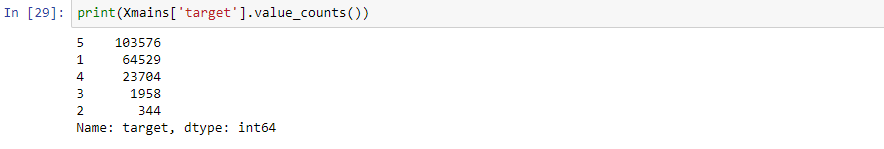

** After resampling, the mix of the recoded loan status. **
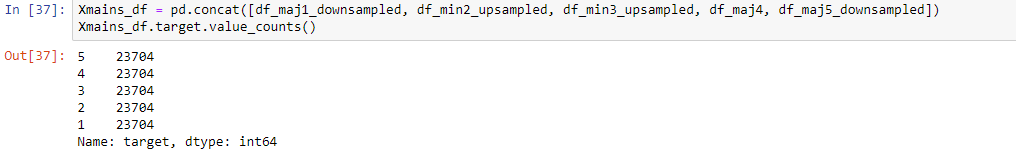

** K-nearest neighbor classifier still performs better than Logistic Regression and Naive Bayes. ** 
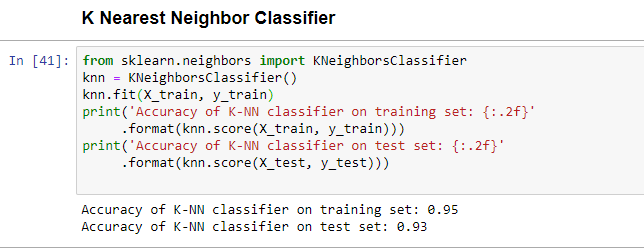
     

### We also try the Random Forest Classifier that is the best performer. 

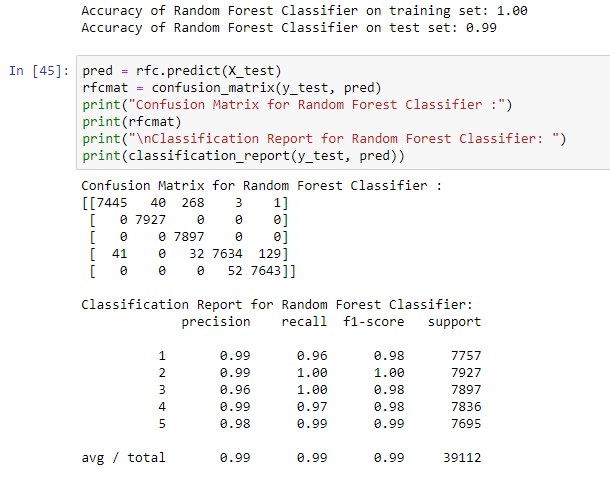


** Set up and load the data set ** 

In [1]:
import numpy as np
import pandas as pd 

In [2]:
location = 'LCDataDictionary.xlsx'
df = pd.read_excel(location)

In [3]:
df.head() 

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee


In [6]:
##  ! wget https://dl.dropboxusercontent.com/s/zt9rxulkaz7s7ho/loansmall.csv?dl=0 -O loansmall.csv 

### Load Project data set 

#### There are 194,111 rows and 74 columns in the project dataset.  
#### There are 44 features left after we eliminate those columns with more than 50 missing values from the project dataset.
####  We called the dataset with 44 features as xdf.

In [4]:
df = pd.read_csv('loansmall.csv')

In [5]:
df.shape

(194111, 74)

In [6]:
ismissing = df.isnull().sum()
ismissing.head() 

id                 0
member_id          0
loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
dtype: int64

In [7]:
drops = ismissing[ismissing >= 50 ]

In [8]:
features_drop = drops.index

In [9]:
len(drops.index)    

30

In [10]:
xdf = df.drop(drops.index, axis=1)

In [11]:
xdf.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,861.07,0.00,0.00,0.00,171.62,Jan-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,603.65,0.00,0.00,0.00,649.91,Jan-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2209.33,16.97,0.00,0.00,357.48,Jan-15,1,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,2233.10,1009.07,0.00,0.00,0.00,67.79,Jan-16,1,INDIVIDUAL,0.0


** Check unique values for each column ** 

In [12]:
for f in df.columns.values: 
    print(f, " ----- with unique ", len(df[f].unique()), " records")

id  ----- with unique  194111  records
member_id  ----- with unique  194111  records
loan_amnt  ----- with unique  1259  records
funded_amnt  ----- with unique  1269  records
funded_amnt_inv  ----- with unique  9473  records
term  ----- with unique  2  records
int_rate  ----- with unique  465  records
installment  ----- with unique  36393  records
grade  ----- with unique  7  records
sub_grade  ----- with unique  35  records
emp_title  ----- with unique  118009  records
emp_length  ----- with unique  12  records
home_ownership  ----- with unique  5  records
annual_inc  ----- with unique  16629  records
verification_status  ----- with unique  3  records
issue_d  ----- with unique  70  records
loan_status  ----- with unique  9  records
pymnt_plan  ----- with unique  2  records
url  ----- with unique  194111  records
desc  ----- with unique  86713  records
purpose  ----- with unique  14  records
title  ----- with unique  53650  records
zip_code  ----- with unique  861  records
addr_state 

** Put columns into two groups based on their values into Numeric group and Categorical Group **

In [13]:
xdf_numerics = xdf.select_dtypes(exclude=['object']) 
xdf_numerics.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,0.0
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,0.0
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,0.0
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,0.0
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,0.0


In [14]:
features_num = xdf_numerics.columns.values
features_num

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'policy_code', 'acc_now_delinq'], dtype=object)

In [15]:
for feature in features_num: 
    print('Numeric feature: ', feature)
    print( pd.pivot_table(df, index=['loan_status'], values=feature)) 
    print('=====' * 20)

Numeric feature:  id
                                                              id
loan_status                                                     
Charged Off                                         4.301179e+06
Current                                             6.337134e+06
Default                                             5.936858e+06
Does not meet the credit policy. Status:Charged...  3.820840e+05
Does not meet the credit policy. Status:Fully Paid  3.961904e+05
Fully Paid                                          3.797667e+06
In Grace Period                                     5.985551e+06
Late (16-30 days)                                   6.111180e+06
Late (31-120 days)                                  6.178838e+06
Numeric feature:  member_id
                                                       member_id
loan_status                                                     
Charged Off                                         5.158810e+06
Current                                  

                                                     open_acc
loan_status                                                  
Charged Off                                         10.719400
Current                                             11.136861
Default                                             11.359223
Does not meet the credit policy. Status:Charged...  10.001319
Does not meet the credit policy. Status:Fully Paid  10.102446
Fully Paid                                          10.518290
In Grace Period                                     11.351585
Late (16-30 days)                                   11.395349
Late (31-120 days)                                  11.286006
Numeric feature:  pub_rec
                                                     pub_rec
loan_status                                                 
Charged Off                                         0.110745
Current                                             0.121818
Default                                         

                                                    total_rec_late_fee
loan_status                                                           
Charged Off                                                   2.698127
Current                                                       0.440780
Default                                                       4.473633
Does not meet the credit policy. Status:Charged...            5.231312
Does not meet the credit policy. Status:Fully Paid            2.655148
Fully Paid                                                    0.438215
In Grace Period                                               4.450091
Late (16-30 days)                                             6.370210
Late (31-120 days)                                            6.194561
Numeric feature:  recoveries
                                                    recoveries
loan_status                                                   
Charged Off                                         977.471953
C

In [16]:
xdf_cats = xdf.select_dtypes(include=['object']) 
xdf_cats.head() 

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type
0,36 months,B,B2,RENT,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-16,INDIVIDUAL
1,60 months,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Sep-13,INDIVIDUAL
2,36 months,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,Nov-01,f,Jan-16,INDIVIDUAL
3,36 months,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,INDIVIDUAL
4,60 months,B,B5,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,INDIVIDUAL


In [17]:
features_cat = xdf_cats.columns.values
features_cat

array(['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_credit_pull_d',
       'application_type'], dtype=object)

In [18]:
cat_outs = ['loan_status', 'url', 'purpose','issue_d', 'title',  'zip_code', 'addr_state','earliest_cr_line', 'last_credit_pull_d']
for feature in features_cat: 
    if feature not in cat_outs: 
        print('Categorical feature: ', feature)
        print( pd.pivot_table(df, index=['loan_status'], columns=feature, values = 'loan_amnt', aggfunc='count')) 
        print('=====' * 20)

Categorical feature:  term
term                                                 36 months   60 months
loan_status                                                               
Charged Off                                              14743        7994
Current                                                  42564       20924
Default                                                    130          76
Does not meet the credit policy. Status:Charged...         649         112
Does not meet the credit policy. Status:Fully Paid        1789         199
Fully Paid                                               83555       18033
In Grace Period                                            681         360
Late (16-30 days)                                          229         115
Late (31-120 days)                                        1224         734
Categorical feature:  grade
grade                                                   A      B      C  \
loan_status                                  

home_ownership                                      MORTGAGE  NONE  OTHER  \
loan_status                                                                 
Charged Off                                          10343.0   7.0   26.0   
Current                                              34677.0   2.0    3.0   
Default                                                 82.0   NaN    NaN   
Does not meet the credit policy. Status:Charged...     348.0   1.0   11.0   
Does not meet the credit policy. Status:Fully Paid     908.0   4.0   27.0   
Fully Paid                                           51721.0  36.0  114.0   
In Grace Period                                        491.0   NaN    NaN   
Late (16-30 days)                                      172.0   NaN    NaN   
Late (31-120 days)                                     938.0   NaN    NaN   

home_ownership                                         OWN     RENT  
loan_status                                                          
Charged Off 

In [19]:
for feature in cat_outs:
    if feature == "url":
        df['url_code'] = np.where(df['url'].str.contains('lendingclub'), 1, 0) 
        print("Categorical Feature: ", feature)
        print(pd.pivot_table(df, index="url_code", columns=['term'], values='int_rate'))
        print("=====" * 20 )        
        
    else:
        print("Categorical Feature: ", feature)
        print(pd.pivot_table(df, index=feature, columns=['term'], values='int_rate'))
        print("=====" * 20 )

Categorical Feature:  loan_status
term                                                 36 months   60 months
loan_status                                                               
Charged Off                                          14.564188   18.355219
Current                                              13.020949   17.183593
Default                                              15.129923   18.426447
Does not meet the credit policy. Status:Charged...   14.210709   16.836429
Does not meet the credit policy. Status:Fully Paid   13.747602   16.055678
Fully Paid                                           12.438258   16.810506
In Grace Period                                      14.651806   19.255583
Late (16-30 days)                                    15.198253   18.787913
Late (31-120 days)                                   14.713382   18.827820
Categorical Feature:  url
term       36 months   60 months
url_code                        
1          12.884186    17.27848
Categorical Feat

term       36 months   60 months
zip_code                        
007xx      10.620000         NaN
010xx      11.380610   16.972673
011xx      13.179661   18.298095
012xx      12.646809   17.893846
013xx      12.436486   16.153158
014xx      12.493800   17.396897
015xx      11.891150   16.443465
016xx      12.301884   18.360000
017xx      11.871188   16.817733
018xx      12.047513   16.856978
019xx      12.145595   16.516203
020xx      12.101619   16.658800
021xx      12.215717   16.845486
022xx      11.533000   21.280000
023xx      12.193267   17.083750
024xx      12.237511   16.206250
025xx      12.918529   16.060741
026xx      11.678462   16.611379
027xx      12.241769   17.103874
028xx      12.745621   16.906800
029xx      12.403383   17.725932
030xx      12.602458   17.559070
031xx      12.622326   17.372857
032xx      12.558734   17.068519
033xx      12.678519   17.242000
034xx      11.955000   18.099091
035xx      13.762778   13.845000
036xx      13.651250   16.880000
037xx     

** Recoding some features for analysis ** 

In [20]:
def recode_target(x):
    if x.endswith('Current'):
        return 1
    if x.endswith('Grace Period'):
        return 1        
    if x.endswith('30 days)'):
        return 2
    if x.endswith('120 days)'):
        return 3       
    if x.endswith('Default'):
        return 4    
    if x.endswith('Charged Off'):
        return 4
    if x.endswith('Fully Paid'):
        return 5
    
    return 6 
    
df['target'] = df['loan_status'].apply(recode_target) 

In [21]:
df['term_cd'] = np.where( df['term'] == '36 months', 1, 0) 

In [22]:
def recode_grade(x):
    if x == 'A' :
        return  1
    if x == 'B' :
        return  2
    if x == 'C' :
        return  3
    if x == 'D' :
        return  4
    if x == 'E' :
        return  5
    if x == 'F' :
        return  6
    if x == 'G' :
        return  7
    
    return 7 
    
df['grade_cd'] = df['grade'].apply(recode_grade)

In [23]:
def recode_home(x):
    if x == 'MORTGAGE' :
        return  1
    if x == 'NONE' :
        return  2
    if x == 'OTHER' :
        return  3
    if x == 'OWN' :
        return  4
    if x == 'RENT' :
        return  5
    return 2 
    
df['home_cd'] = df['home_ownership'].apply(recode_home)

In [24]:
Xdf = xdf_numerics
Xdf['term_cd'] = df['term_cd']
Xdf['grade_cd'] = df['grade_cd']
Xdf['home_cd'] = df['home_cd']
Xdf['target'] = df['target']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [25]:
Xkeeps = Xdf.drop(columns=['policy_code', 'term_cd'], axis=1)


In [26]:
Xkeeps.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,grade_cd,home_cd,target
id,1.000000,0.970585,0.125117,0.135422,0.160821,0.167846,0.144287,0.019751,0.141335,0.065675,...,-0.028650,0.060082,-0.050677,-0.002862,-0.008843,0.053229,0.026171,0.047659,-0.059687,-0.398180
member_id,0.970585,1.000000,0.125686,0.135927,0.161444,0.159657,0.143200,0.018062,0.134246,0.059427,...,-0.024398,0.061147,-0.050859,-0.004233,-0.010186,0.052435,0.024133,0.040441,-0.062205,-0.396312
loan_amnt,0.125117,0.125686,1.000000,0.996551,0.986320,0.193517,0.950588,0.336186,0.083704,0.014527,...,0.743512,0.741019,0.042361,0.137547,0.080083,0.368059,0.012936,0.168232,-0.207247,-0.125134
funded_amnt,0.135422,0.135927,0.996551,1.000000,0.990482,0.195963,0.955838,0.334738,0.086470,0.015535,...,0.744989,0.742156,0.041936,0.137440,0.080078,0.368895,0.013322,0.167414,-0.206727,-0.129411
funded_amnt_inv,0.160821,0.161444,0.986320,0.990482,1.000000,0.199897,0.945451,0.329014,0.094204,0.016172,...,0.736628,0.739352,0.033134,0.133324,0.073817,0.367528,0.013803,0.158557,-0.206630,-0.140175
int_rate,0.167846,0.159657,0.193517,0.195963,0.199897,1.000000,0.179737,-0.022616,0.179751,0.104400,...,-0.036055,0.488344,0.052569,0.137583,0.072393,0.091340,0.038024,0.937344,0.105770,-0.109245
installment,0.144287,0.143200,0.950588,0.955838,0.945451,0.179737,1.000000,0.335329,0.085001,0.028524,...,0.775359,0.653757,0.049565,0.126342,0.075305,0.350336,0.016577,0.147716,-0.168536,-0.093820
annual_inc,0.019751,0.018062,0.336186,0.334738,0.329014,-0.022616,0.335329,1.000000,-0.167451,0.058822,...,0.303156,0.204627,0.017986,0.021533,0.014440,0.152687,0.013489,-0.014102,-0.187628,-0.003848
dti,0.141335,0.134246,0.083704,0.086470,0.094204,0.179751,0.085001,-0.167451,1.000000,-0.004455,...,-0.004800,0.131866,-0.007311,0.037580,0.020503,-0.015603,0.008615,0.130124,-0.009222,-0.114484
delinq_2yrs,0.065675,0.059427,0.014527,0.015535,0.016172,0.104400,0.028524,0.058822,-0.004455,1.000000,...,-0.005081,0.045512,0.022954,0.011044,0.007904,0.000789,0.116333,0.095672,-0.049003,-0.029778


** From correlation matrix, we have selected the some features *Xmains* for further investigation **

In [27]:
Xmains = Xdf[['target', 'loan_amnt', 'int_rate',  'out_prncp', 'out_prncp_inv', 'total_rec_prncp',
             'total_rec_int', 'last_pymnt_amnt', 'grade_cd', 'home_cd']]
outs = [ 'pub_rec', 'revol_bal', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'total_acc', 'total_rec_late_fee',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'acc_now_delinq']
Xmains.corr()

,target,loan_amnt,int_rate,out_prncp,out_prncp_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,grade_cd,home_cd
target,1.000000,-0.125134,-0.109245,-0.630173,-0.630095,0.181928,-0.301724,0.443582,-0.054408,0.039471
loan_amnt,-0.125134,1.000000,0.193517,0.421353,0.421313,0.743512,0.741019,0.368059,0.168232,-0.207247
int_rate,-0.109245,0.193517,1.000000,0.233355,0.233459,-0.036055,0.488344,0.091340,0.937344,0.105770
out_prncp,-0.630173,0.421353,0.233355,1.000000,0.999996,-0.033883,0.640718,-0.246990,0.184645,-0.106646
out_prncp_inv,-0.630095,0.421313,0.233459,0.999996,1.000000,-0.033929,0.640688,-0.246958,0.184740,-0.106607
total_rec_prncp,0.181928,0.743512,-0.036055,-0.033883,-0.033929,1.000000,0.422247,0.645115,-0.041421,-0.165335
total_rec_int,-0.301724,0.741019,0.488344,0.640718,0.640688,0.422247,1.000000,0.063601,0.466708,-0.115235
last_pymnt_amnt,0.443582,0.368059,0.091340,-0.246990,-0.246958,0.645115,0.063601,1.000000,0.076939,-0.101666
grade_cd,-0.054408,0.168232,0.937344,0.184645,0.184740,-0.041421,0.466708,0.076939,1.000000,0.107505
home_cd,0.039471,-0.207247,0.105770,-0.106646,-0.106607,-0.165335,-0.115235,-0.101666,0.107505,1.000000


In [28]:
print(Xmains.shape) 
Xmains.columns.values

(194111, 10)


array(['target', 'loan_amnt', 'int_rate', 'out_prncp', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'grade_cd',
       'home_cd'], dtype=object)

In [29]:
print(Xmains['target'].value_counts())

5    103576
1     64529
4     23704
3      1958
2       344
Name: target, dtype: int64


### We can see the imbalanced class for target variable

#### We are applying resample scheme to get the balanced class for modeling  
* 23,704, the size of accounts with status as Charged offs and Defaults (class 4) is used for baseline 


In [31]:
from sklearn.utils import resample

In [32]:
df_maj4 = Xmains[Xmains.target==4]
df_min3 = Xmains[Xmains.target==3]
 
# Up sample minority class
df_min3_upsampled = resample(df_min3, 
                                 replace=True,      # sample with replacement
                                 n_samples=23704,    # to match majority class
                                 random_state=456)  # reproducible results
 
# Combine majority class with upsampled minority class
df_up3 = pd.concat([df_maj4, df_min3_upsampled])
 
# Display new class counts
df_up3.target.value_counts()


4    23704
3    23704
Name: target, dtype: int64

In [33]:
df_min2 = Xmains[Xmains.target==2]
 
# Up sample minority class
df_min2_upsampled = resample(df_min2, 
                                 replace=True,      # sample with replacement
                                 n_samples=23704,    # to match majority class
                                 random_state=456)  # reproducible results
 
# Combine majority class with upsampled minority class
df_up2 = pd.concat([df_maj4, df_min2_upsampled])
 
# Display new class counts
df_up2.target.value_counts()


4    23704
2    23704
Name: target, dtype: int64

In [34]:
df_maj1 = Xmains[Xmains.target==1]
 
# Down sample minority class
df_maj1_downsampled = resample(df_maj1, 
                                 replace=False,      # sample without replacement
                                 n_samples=23704,    # to match majority class
                                 random_state=456)  # reproducible results
 
# Combine majority class with upsampled minority class
df_down1 = pd.concat([df_maj4, df_maj1_downsampled])
 
# Display new class counts
df_down1.target.value_counts()


4    23704
1    23704
Name: target, dtype: int64

In [35]:
df_maj5 = Xmains[Xmains.target==5]
 
# down sample minority class
df_maj5_downsampled = resample(df_maj5, 
                                 replace=False,      # sample with replacement
                                 n_samples=23704,    # to match majority class
                                 random_state=456)  # reproducible results
 
# Combine majority class with upsampled minority class
df_down5 = pd.concat([df_maj4, df_maj5_downsampled])
 
# Display new class counts
df_down5.target.value_counts()


5    23704
4    23704
Name: target, dtype: int64

In [37]:
Xmains_df = pd.concat([df_maj1_downsampled, df_min2_upsampled, df_min3_upsampled, df_maj4, df_maj5_downsampled]) 
Xmains_df.target.value_counts() 

5    23704
4    23704
3    23704
2    23704
1    23704
Name: target, dtype: int64

## Using Scikit Learn packages to do classification 
 * Logistic Regression 
 * K Nearest Neighbors
 * Naive Bayesian 

In [38]:
seed = 42 
np.random.seed(seed)

### Split modeling data into train/test 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xmains_df[['loan_amnt', 'grade_cd', 'home_cd',
                                                           'int_rate', 'out_prncp', 'out_prncp_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt'
                                                           ]], Xmains_df['target'], random_state=seed, test_size=0.33)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Classifier 

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on test set: 0.65


### K Nearest Neighbor Classifier 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.93


### Naive Bayes Classifier 

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))


Accuracy of GNB classifier on training set: 0.40
Accuracy of GNB classifier on test set: 0.39


## K Nearest-Neighbor classifier is a winner 

### KNN Classifier needs the longest time to run in three classifiers. 

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
mat = confusion_matrix(y_test, pred)
print("Confusion Matrix for KNN :")
print(mat) 
print("\nClassification Report for KNN: ")
print(classification_report(y_test, pred))

Confusion Matrix for KNN :
[[5789  332 1450   24  162]
 [   0 7927    0    0    0]
 [  58   11 7828    0    0]
 [  79    7   55 7523  172]
 [ 108   12   44  102 7429]]

Classification Report for KNN: 
             precision    recall  f1-score   support

          1       0.96      0.75      0.84      7757
          2       0.96      1.00      0.98      7927
          3       0.83      0.99      0.91      7897
          4       0.98      0.96      0.97      7836
          5       0.96      0.97      0.96      7695

avg / total       0.94      0.93      0.93     39112



### The balanced data shows that K-Nearest Neighbor Classifier performs well too. 

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.99


In [45]:
pred = rfc.predict(X_test)
rfcmat = confusion_matrix(y_test, pred)
print("Confusion Matrix for Random Forest Classifier :")
print(rfcmat) 
print("\nClassification Report for Random Forest Classifier: ")
print(classification_report(y_test, pred))

Confusion Matrix for Random Forest Classifier :
[[7445   40  268    3    1]
 [   0 7927    0    0    0]
 [   0    0 7897    0    0]
 [  41    0   32 7634  129]
 [   0    0    0   52 7643]]

Classification Report for Random Forest Classifier: 
             precision    recall  f1-score   support

          1       0.99      0.96      0.98      7757
          2       0.99      1.00      1.00      7927
          3       0.96      1.00      0.98      7897
          4       0.99      0.97      0.98      7836
          5       0.98      0.99      0.99      7695

avg / total       0.99      0.99      0.99     39112

